In [1]:
alpha = 0.4

Convolved = []

def UnitStep(n):
    if n>=0:
        return 1
    else:
        return 0

def Input(n):
    return (alpha**n)*UnitStep(n)

def Convolution(n):
    for i in range(n):
        sum = 0
        for j in range(12):
            sum+= Input(j)*UnitStep(i-j)  
        Convolved.append(sum)

Convolution(11)
print(Convolved)

[1.0, 1.4, 1.56, 1.624, 1.6496000000000002, 1.6598400000000002, 1.6639360000000003, 1.6655744000000003, 1.6662297600000004, 1.6664919040000004, 1.6665967616000004]


In [2]:

import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import convolve
from IPython.display import Audio, display


def manual_convolve (signal, filter):
    lsignal=len(signal)
    lfilter=len(filter)
    loutput=lsignal+ lfilter - 1
    output=np.zeros(loutput)
    for n in range(loutput):
       for k in range(lsignal):
          if (n-k) in range(lfilter):
           output[n] += signal[k]*filter[n-k]
    return output


fs_inp, inp= wav.read("BheegiRegular.wav")

plt.figure(figsize=(19,5))
plt.title("Original Audio Signal")
plt.plot(inp)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

rate_rir, rir = wav.read("Five_Columns_Long_16k.wav")

inp=inp/(np.max(np.abs(inp)))
rir_left = rir[:, 0]
rir_right = rir[:, 1]

out_left = manual_convolve(inp, rir_left)
out_right = manual_convolve(inp, rir_right)

out = np.vstack((out_left, out_right)).T

out=out/(np.max(np.abs(out)))
out=(out*32767).astype(np.int16) 

wav.write("five_columns_manual_convolve.wav", fs_inp, out)

plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.title("Left Ear Convolved Signal")
plt.plot(out[:,0], color='brown')
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("Right Ear Convolved Signal")
plt.plot(out[:,1], color='cyan')
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

plt.figure(figsize=(19,5))
plt.title("Overlaid Convolved Signal (Left and Right Channels)")
plt.plot(out[:, 0], label='Left Channel', color='brown')
plt.plot(out[:, 1], label='Right Channel', color='cyan')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()




KeyboardInterrupt: 

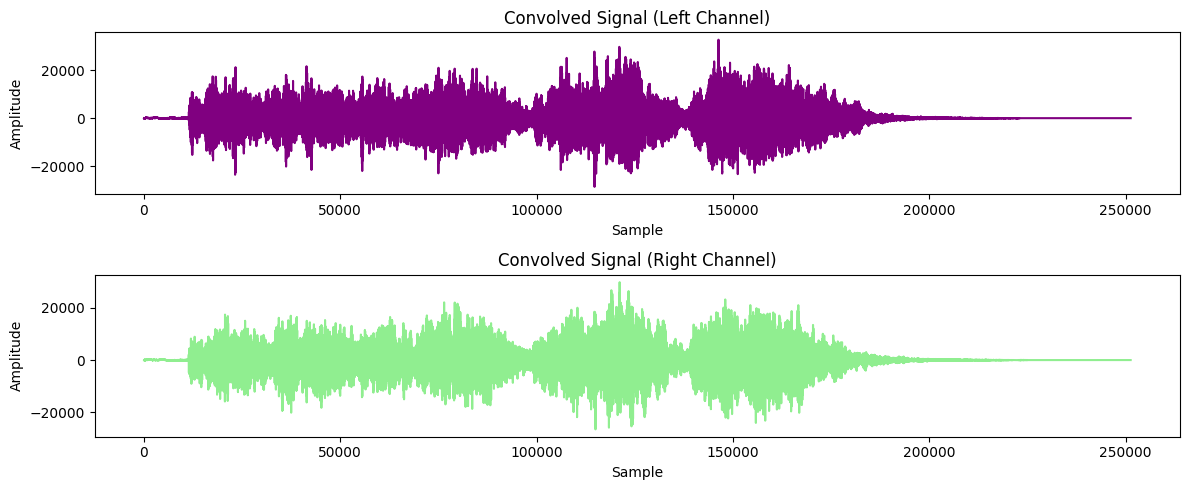

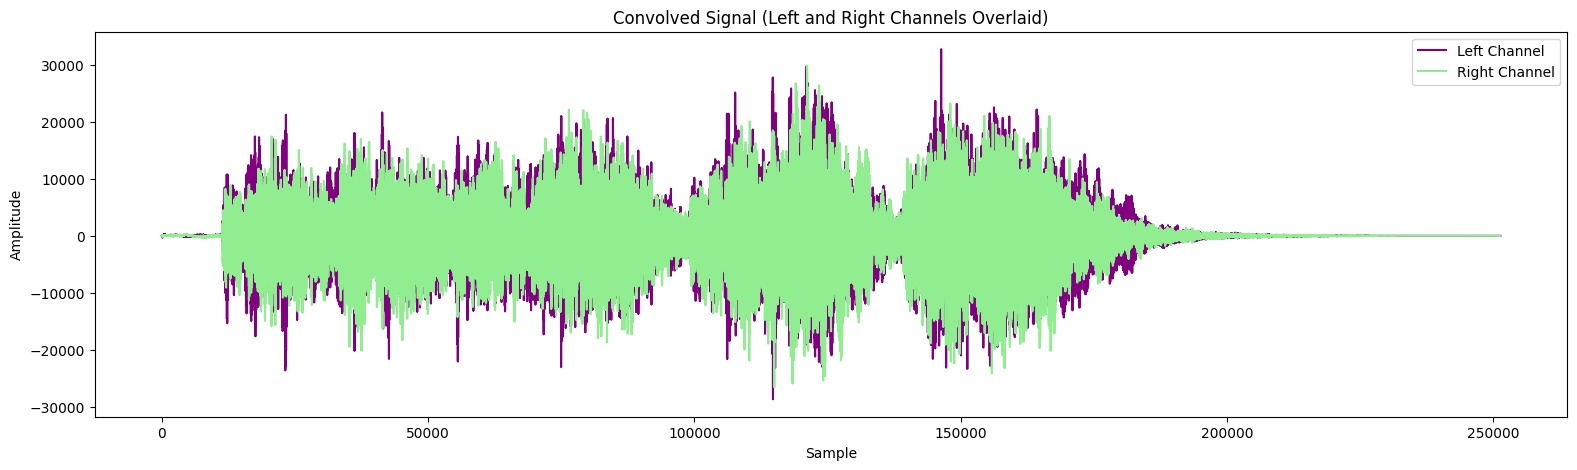

In [4]:

import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

fs_inp, inp = wav.read("BheegiRegular.wav")

rate_rir, rir = wav.read("long_echo_hall_16k.wav")

rir_left = rir[:, 0]
rir_right = rir[:, 1]

out_left = fftconvolve(inp, rir_left, mode = 'full')
out_right = fftconvolve(inp, rir_right, mode = 'full')

out = np.vstack((out_left, out_right)).T

out = out / np.max(np.abs(out))
out=(out*32767).astype(np.int16) 

wav.write("long_echo_hall_convolve.wav", fs_inp, out)

plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0], color='purple')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1], color='lightgreen')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

plt.figure(figsize=(19,5))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='purple')
plt.plot(out[:, 1], label='Right Channel', color='lightgreen')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()




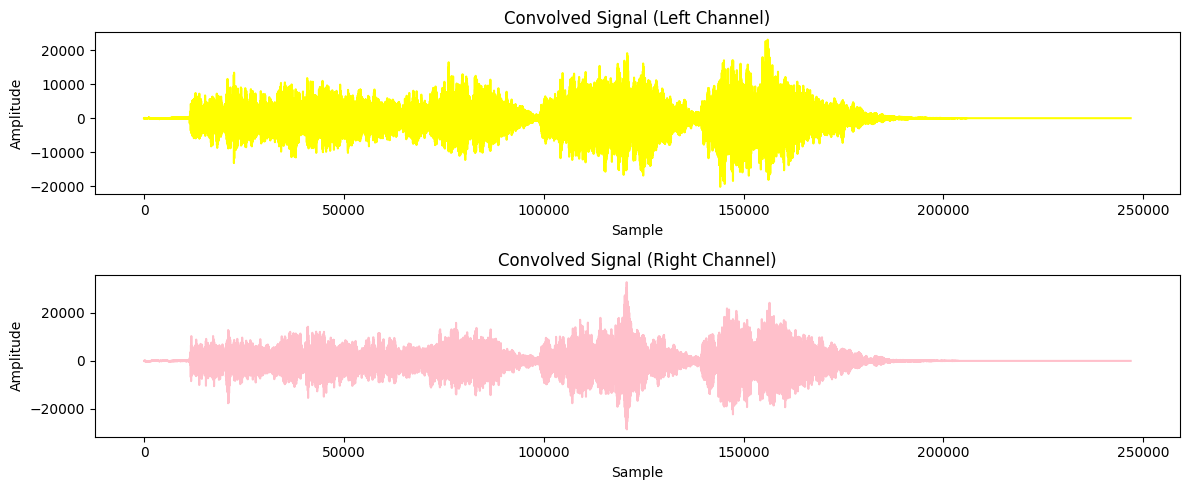

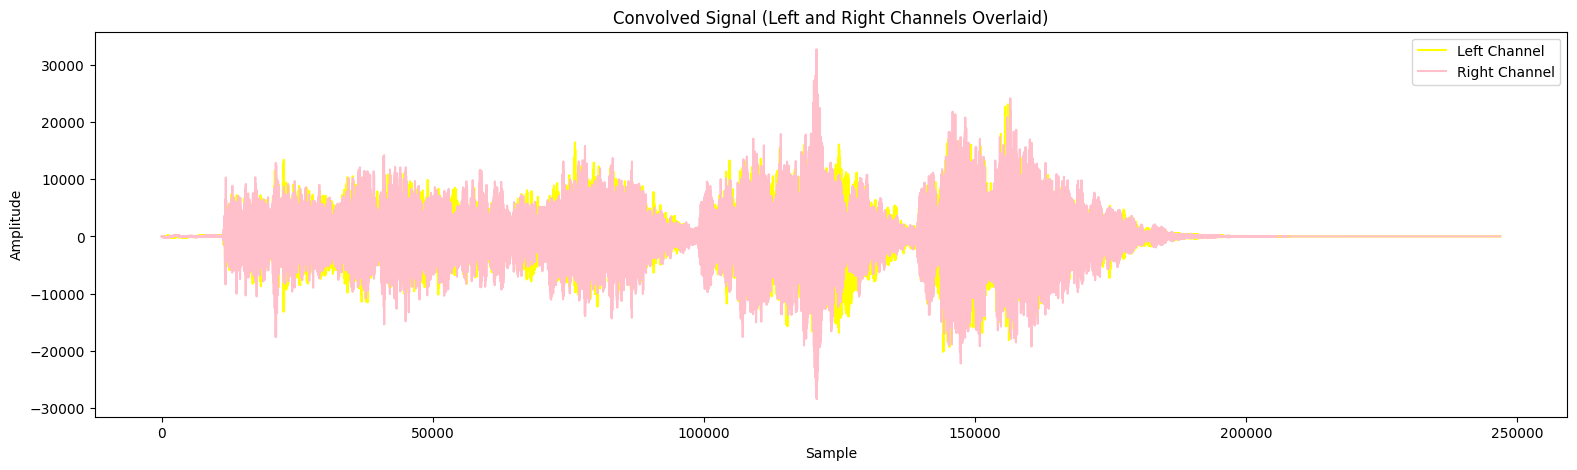

In [5]:

import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import convolve, fftconvolve
from IPython.display import Audio, display

fs_inp, inp = wav.read("BheegiRegular.wav")

rate_rir, rir = wav.read("parking_garage_16k.wav")

rir_left = rir[:, 0]
rir_right = rir[:, 1]

out_left = fftconvolve(inp, rir_left, mode = 'full')
out_right = fftconvolve(inp, rir_right, mode = 'full')

out = np.vstack((out_left, out_right)).T

out = out / np.max(np.abs(out))
out=(out*32767).astype(np.int16) 

wav.write("parking_garage.wav", fs_inp, out)

plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0], color='yellow')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1], color='pink')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

plt.figure(figsize=(19,5))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='yellow')
plt.plot(out[:, 1], label='Right Channel', color='pink')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


